# Fraud Detection - Credit Card Fraud Detection and Prevention
<br>
The objective of this project is to detect fraudulent cases using a dataset of credit card transactions. 

1. Problem Statement
2. Data Collection
3. Exploratory Data Analysis
4. Traditional Method
5. Supervised Machine Learning
6. Unsupervised Machine Learning
7. Discussion and Conclusion


# <a name="problem">Problem Statement</a>
Organizations around the world lose an estimated five percent of their annual revenues to fraud, according to a survey of Certified Fraud Examiners (CFEs) who investigated cases between January 2010 and December 2011. Applied to the estimated 2011 Gross World Product, this figure translates to a potential total fraud loss of more than $3.5 trillion. ([Source](https://www.acfe.com/press-release.aspx?id=4294973129)). In this project, we will explore how to fight fraud by using data. We will apply machine learning algorithms to detect fraudulent behavior similar to past ones. In fraud analytics we often deal with highly imbalanced datasets when classifying fraud versus non-fraud, and in this project we will examine some techniques on how to deal with that. For example, we will make use of ```imbalanced-learn```, a Python module to balance data set using under- and over-sampling. 

# <a name="data">Dataset</a>

The dataset used in this project is downloaded from Kaggle. It is a dataset containing credit card transactions data. Fraud occurrences are fortunately an extreme minority in these transactions. However, Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of fraud, then there's little data to learn how to identify them. This is known as <strong>*class imbalance*</strong>, and it's one of the main challenges of fraud detection. Let's explore this dataset, and observe this class imbalance problem.

# <a name="eda">Exploratory Data Analysis</a>

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# to plot within notebook
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv("credit_card_data_3.csv")

df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [3]:
# explore the features available in the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [4]:
# summary statistics
df.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,142870.017030,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,...,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,82574.683531,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,...,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,5.000000,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,...,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,71817.750000,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,...,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,142544.000000,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,...,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,215019.000000,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,...,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,284782.000000,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,...,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


In [5]:
# check for missing values
df.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [6]:
# count the occurrences of fraud and no fraud cases
df["Class"].value_counts()

0    5000
1      50
Name: Class, dtype: int64

In [7]:
# ratio of fraud and no fraud cases
df["Class"].value_counts(normalize=True)

0    0.990099
1    0.009901
Name: Class, dtype: float64

---
# <a name="trad">Traditional Method</a>
### Exploring the traditional way to catch fraud

We will start off by finding fraud cases in the credit card dataset the "old way". First we'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on the features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, we'll use that information to create common sense thresholds. Finally, we'll check how well this performs in fraud detection.

Steps:
- Use groupby() to group df on Class and obtain the mean of the features.
- Create the condition V1 smaller than -3, and V3 smaller than -5 as a condition to flag fraud cases.
- As a measure of performance, use the crosstab function from pandas to compare the flagged fraud cases to actual fraud cases.

In [8]:
# get the mean for each group
df.groupby("Class").mean()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,143084.8702,0.035030,0.011553,0.037444,-0.045760,-0.013825,-0.030885,0.014315,-0.022432,-0.002227,...,-0.002896,-0.010583,-0.010206,-0.003305,-0.000918,-0.002613,-0.004651,-0.009584,0.002414,85.843714
1,121384.7000,-4.985211,3.321539,-7.293909,4.827952,-3.326587,-1.591882,-5.776541,1.395058,-2.537728,...,0.194580,0.703182,0.069065,-0.088374,-0.029425,-0.073336,-0.023377,0.380072,0.009304,113.469000


In [9]:
# implement a rule for stating which cases are flagged as fraud
df["flag_as_fraud"] = np.where(np.logical_and(df["V1"] < -3, df["V3"] < -5), 1, 0)
df["flag_as_fraud"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: flag_as_fraud, dtype: int32

In [10]:
# create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=["Actual Fraud"], colnames=["Flagged Fraud"]))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


With this rule, we detect 22 out of 50 fraud cases, but can't detect the other 28, and get 16 false positives. Next, we'll see how this measures up to a machine learning model.

In [12]:
# machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import sklearn
print(sklearn.__version__)

1.2.2


---
# <a name="sml">Supervised Machine Learning</a>
### Machine learning model to catch fraud
When we have labelled data, we can use supervised machine learning techniques to flag fraudulent transactions. We can use classifiers, adjust them and compare them to find the most efficient fraud detection model.

In [13]:
# create input and target variable
X = df.drop(["Unnamed: 0", "Class", "flag_as_fraud"], axis=1)
y = df["Class"]

In [14]:
# create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# fit a logistic regression model to the data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [16]:
# obtain model predictions
predicted = model.predict(X_test)

In [17]:
# predict probabilities
probs = model.predict_proba(X_test)

In [18]:
# print the accuracy score
print("Accuracy Score: {}".format(accuracy_score(y_test, predicted)))

Accuracy Score: 0.998019801980198


In [19]:
# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, probs[:,1])))

# print the classifcation report and confusion matrix
print("Classification report:\n{}\n".format(classification_report(y_test, predicted)))

# print confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print("Confusion matrix:\n{}\n".format(conf_mat))

ROC score: 0.9996013289036545

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.89      0.80      0.84        10

    accuracy                           1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515


Confusion matrix:
[[1504    1]
 [   2    8]]



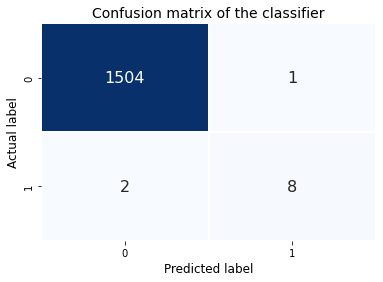

In [20]:
# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("cm.png", bbox_inches="tight")
plt.show()

As shown above, we managed to catch 8 out of 10 fraud cases, only 1 false positive and 2 false negative, not bad for our first machine learning model. 

### Data Resampling

To deal with class imbalance, we can either undersample the majority class (non-fraud cases) or oversample the minority class (fraud cases). But there are drawbacks. With undersampling, we are throwing away a lot of data and information. With oversampling, we are copying data and creating duplicates. SMOTE or Synthetic Minority Over-sampling Technique may be a better way of adjusting class imbalance by oversampling minority class. With SMOTE, we are not just copying monitority class, SMOTE uses characteristics of nearest neighbours of fraud cases to create new synthetic fraud cases and avoid duplicates. But it only works well if the fraud cases are quite similar to each other. If fraud is spread out over the data and not very distinct, using nearest neighbours to create more fraud cases introduces a bit of noise in the data, as the nearest neighbours might not necessarily be fraud cases. 

One thing to keep in mind: Use resampling methods on training set, never on test set. Always make sure the test set is free of duplicate or synthetic data.

In [21]:
# import SMOTE
from imblearn.over_sampling import SMOTE

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

In [22]:
# check before and after resample
print("Before resampling:\n{}\n".format(y_train.value_counts()))
print("After resampling:\n{}\n".format(pd.Series(y_resampled).value_counts()))

Before resampling:
0    3495
1      40
Name: Class, dtype: int64

After resampling:
0    3495
1    3495
Name: Class, dtype: int64



The result above shows how the balance between the two classes has changed with SMOTE. Using SMOTE gives us more observations of the minority class. Unlike Random Over-sampling, SMOTE does not create exact copies of observations,  but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations. We can then fit the resampled training data into a machine learning model and make prediction on the non-resampled test data.

In [23]:
# fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_resampled, y_resampled)

# make predictions
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# print the accuracy score
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))

# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, probs[:,1])))

# print the classifcation report and confusion matrix
print("Classification report:\n{}\n".format(classification_report(y_test, predicted)))

# print confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print("Confusion matrix:\n{}\n".format(conf_mat))

Accuracy Score: 0.996039603960396

ROC score: 0.9995348837209301

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.62      1.00      0.77        10

    accuracy                           1.00      1515
   macro avg       0.81      1.00      0.88      1515
weighted avg       1.00      1.00      1.00      1515


Confusion matrix:
[[1499    6]
 [   0   10]]



#### Pipeline
We can also use a pipeline that combines the resampling method with the model in one go. First, we need to define the pipeline that we're going to use. The Pipeline() requires two arguments. We need to state we want to combine resampling with the model in the respective arguments.

After we defined our pipeline, aka by combining a logistic regression with a SMOTE method, we can run it on the data. We can treat the pipeline as if it were a single machine learning model.

In [24]:
# import SMOTE
from imblearn.over_sampling import SMOTE

# this is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression(solver="liblinear")

# define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([("SMOTE", resampling), ("Logistic Regression", model)])

In [25]:
# fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)

# print the accuracy score
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))

# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, probs[:,1])))

# print the classifcation report and confusion matrix
print("Classification report:\n{}\n".format(classification_report(y_test, predicted)))

# print confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print("Confusion matrix:\n{}\n".format(conf_mat))

Accuracy Score: 0.996039603960396

ROC score: 0.9995348837209302

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.62      1.00      0.77        10

    accuracy                           1.00      1515
   macro avg       0.81      1.00      0.88      1515
weighted avg       1.00      1.00      1.00      1515


Confusion matrix:
[[1499    6]
 [   0   10]]



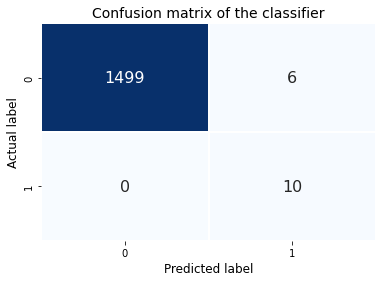

In [26]:
# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

As we can see, the SMOTE slightly improves our results. We now manage to find all cases of fraud, but we have a slightly higher number of false positives, albeit only 6 cases. Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

### Random Forest

Accuracy can be misleading in the case of fraud detection. A model with no predictive power and just predict everything as non-fraud will have high accuracy. That does not mean it is a good model. With highly imbalanced fraud data, we need to look at Precision, Recall and the AUC ROC curve. These are more reliable performance metric, used to compare different classifiers.

To understand Precision and recall, we need to understand False negative and False positive. False negative - predicted no fraud but actually there is fraud. False positive - false alarm, predicted fraud but actually no fraud. Different companies implementing fraud detection may focus on different aspect. For example, Banks and Insurance companies may have different focus. 

Banks may want to minimize false negative, catch as many fraud as possible, because fraud credit card transactions can cost alot of money, they don't mind false positive because it just means stopping the transaction. Therefore banks may want to optimize for Recall, as high as possible, means out of all actual fraud cases, as many as possible are flagged, achieving a high percentage of predicted fraud cases out of all actual fraud cases.

On the other hand, insurance companies may want to minimize false positive, i.e. minimize false alarm, because high false alarm would mean incur huge resources of assembling a team of investigators to go through each flagged fraud case. Thus, insurance companies may want to optimize for Precision, as high as possible, achieving a high percentage of actual fraud cases out of all predicted fraud cases .

Precision and recall are inversely related, as Precision increases, Recall falls and vice-versa. This is the Precision-Recall Tradeoff. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy. However, a better metric is the AUC ROC (area under the receiver operating characteristic curve). The AUC ROC answers the question: "How well can this classifier be expected to perform in general, at a variety of different baseline probabilities?" but precision and recall don't. 

Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize our model settings to get the best possible Recall score. If we also cared about reducing the number of false positives, we could optimize on F1-score, this gives us that nice Precision-Recall trade-off. To decide which final model is best, we need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with. Ultimately, this final decision should be made by us and the fraud team together.

Having said that, accuracy is a good metric to start as we need to know what the "natural accuracy" is, if we were to predict everything as non-fraud. It is important to understand which level of "accuracy" we need to "beat" in order to get a better prediction than by doing nothing. In the following section, we'll create our first random forest classifier for fraud detection. That will serve as the "baseline" model that we're going to try to improve.

In [27]:
# load dataset
df = pd.read_csv("credit_card_data_2.csv")

df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [28]:
# explore the features available in the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7300 non-null   int64  
 1   V1          7300 non-null   float64
 2   V2          7300 non-null   float64
 3   V3          7300 non-null   float64
 4   V4          7300 non-null   float64
 5   V5          7300 non-null   float64
 6   V6          7300 non-null   float64
 7   V7          7300 non-null   float64
 8   V8          7300 non-null   float64
 9   V9          7300 non-null   float64
 10  V10         7300 non-null   float64
 11  V11         7300 non-null   float64
 12  V12         7300 non-null   float64
 13  V13         7300 non-null   float64
 14  V14         7300 non-null   float64
 15  V15         7300 non-null   float64
 16  V16         7300 non-null   float64
 17  V17         7300 non-null   float64
 18  V18         7300 non-null   float64
 19  V19         7300 non-null  

In [29]:
# summary statistics
df.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,...,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,141459.804384,-0.193825,0.159880,-0.278411,0.193200,-0.128358,-0.048911,-0.202722,0.029468,-0.099865,...,0.033059,-0.003541,0.004062,-0.001630,-0.001130,0.011666,0.009332,0.005830,90.372956,0.041096
std,82409.871073,2.521772,1.970007,2.488454,1.746604,1.826802,1.371383,2.175403,1.764826,1.307587,...,1.071380,0.778235,0.654663,0.597398,0.531629,0.484641,0.464333,0.330659,289.206749,0.198526
min,104.000000,-31.972536,-42.172688,-31.103685,-5.047408,-28.815577,-8.389238,-43.557242,-41.044261,-13.320155,...,-22.797604,-8.887017,-17.530682,-2.822684,-4.547278,-1.577118,-7.263482,-3.916662,0.000000,0.000000
25%,70172.500000,-0.995027,-0.550039,-1.029977,-0.796602,-0.737594,-0.801558,-0.602338,-0.199438,-0.708590,...,-0.232682,-0.543785,-0.165239,-0.356176,-0.320517,-0.317820,-0.070511,-0.054776,5.000000,0.000000
50%,141476.000000,-0.081147,0.103165,0.112765,0.050026,-0.056608,-0.300839,0.031776,0.033797,-0.086823,...,-0.020227,0.007343,-0.012333,0.038141,0.013887,-0.035643,0.006109,0.012170,21.855000,0.000000
75%,213021.250000,1.291141,0.884756,1.012824,0.871857,0.616391,0.380007,0.558040,0.352100,0.583610,...,0.200228,0.528939,0.146370,0.428241,0.351934,0.270810,0.106617,0.083614,76.000000,0.000000
max,284764.000000,2.446505,22.057729,3.757300,12.132323,12.791416,21.190194,26.249717,20.007208,8.141560,...,27.202839,8.316275,13.218751,3.437028,3.590787,3.116200,5.058448,15.124103,12910.930000,1.000000


In [30]:
# check for missing values
df.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [31]:
# count the occurrences of fraud and no fraud
df["Class"].value_counts()

0    7000
1     300
Name: Class, dtype: int64

In [32]:
# calculate the ratio of fraud and no fraud
df["Class"].value_counts(normalize=True)

0    0.958904
1    0.041096
Name: Class, dtype: float64

In [33]:
# create input and target variable
X = df.drop(["Unnamed: 0", "Class"], axis=1)
y = df["Class"]

In [34]:
# create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Model adjustments

A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the ```class_weights``` option when defining your sklearn model. The ```"balanced"``` mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). The ```"balanced_subsample"``` mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

In [35]:
# define the model as the random forest
model = RandomForestClassifier(class_weight="balanced_subsample", random_state=0)

# fit the model to our training set
model.fit(X_train, y_train)

# obtain predictions from the test data 
predicted = model.predict(X_test)

# predict probabilities
probs = model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))

Accuracy Score: 0.9917808219178083

ROC score = 0.9599914140171406

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.81      0.89        91

    accuracy                           0.99      2190
   macro avg       0.99      0.91      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2098    1]
 [  17   74]]



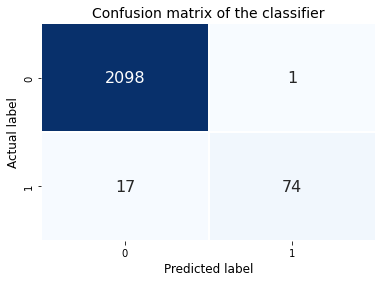

In [36]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

### GridSearchCV to find optimal parameters

With GridSearchCV we can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize our model settings to get the best possible Recall score. If we also cared about reducing the number of false positives, we could optimize on F1-score, this gives us that nice Precision-Recall trade-off.

In [37]:
%%time
# define the parameter sets to test
param_grid = {"n_estimators": [10, 50], 
              "max_features": ["auto", "log2"],  
#               "min_samples_leaf": [1, 10],
              "max_depth": [4, 8], 
              "criterion": ["gini", "entropy"], 
              "class_weight": [None, {0:1, 1:12}]
}

# define the model to use
model = RandomForestClassifier(random_state=0)

# combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="recall", n_jobs=-1)

# fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)


CPU times: total: 609 ms
Wall time: 27.9 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': [None, {0: 1, 1: 12}],
                         'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 50]},
             scoring='recall')

In [38]:
# show best parameters
CV_model.best_params_

{'class_weight': {0: 1, 1: 12},
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 10}

In [39]:
# obtain predictions from the test data 
predicted = CV_model.predict(X_test)

# predict probabilities
probs = CV_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))

Accuracy Score: 0.9899543378995433

ROC score = 0.9519891732850283

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.92      0.84      0.87        91

    accuracy                           0.99      2190
   macro avg       0.95      0.92      0.93      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2092    7]
 [  15   76]]



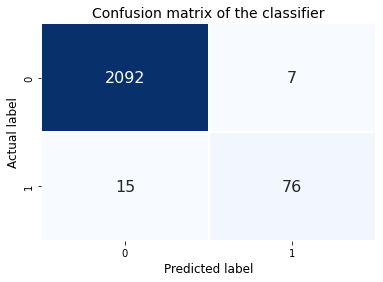

In [40]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

In [41]:
# or manually input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='entropy',
            n_estimators=50, max_features='log2', max_depth=4, n_jobs=-1, random_state=0)

model.fit(X_train, y_train)
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))

Accuracy Score: 0.9922374429223745

ROC score = 0.9743415231743007

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.82      0.90        91

    accuracy                           0.99      2190
   macro avg       0.99      0.91      0.95      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2098    1]
 [  16   75]]



### Logistic Regression

In [42]:
# define the Logistic Regression model with weights
lr_model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, solver="liblinear")

# fit the model to our training data
lr_model.fit(X_train, y_train)

# obtain predictions from the test data 
predicted = lr_model.predict(X_test)

# predict probabilities
probs = lr_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))

Accuracy Score: 0.9748858447488584

ROC score = 0.9721007910622013

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2099
           1       0.65      0.88      0.74        91

    accuracy                           0.97      2190
   macro avg       0.82      0.93      0.87      2190
weighted avg       0.98      0.97      0.98      2190


Confusion Matrix:
[[2055   44]
 [  11   80]]



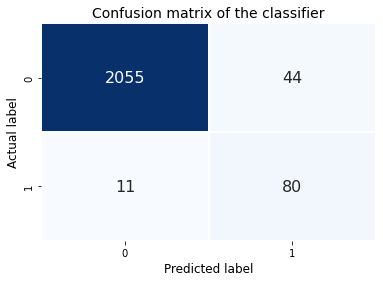

In [43]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

Logistic Regression has quite different performance from the Random Forest. More false positives, but also a better Recall. It will therefore be a useful addition to the Random Forest in an ensemble model.

### Decision Tree

In [44]:
# define the Decision Tree model with balanced weight
tree_model = DecisionTreeClassifier(random_state=0, class_weight="balanced")

# fit the model to our training data
tree_model.fit(X_train, y_train)

# obtain predictions from the test data 
predicted = tree_model.predict(X_test)

# predict probabilities
probs = tree_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))

Accuracy Score: 0.9835616438356164

ROC score = 0.9125800354957098

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2099
           1       0.78      0.84      0.81        91

    accuracy                           0.98      2190
   macro avg       0.89      0.91      0.90      2190
weighted avg       0.98      0.98      0.98      2190


Confusion Matrix:
[[2078   21]
 [  15   76]]



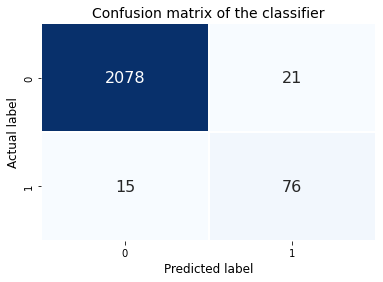

In [45]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

Compared to  Random Forest, Decision Tree also has more false positives, but a better Recall. It will therefore be a useful addition to the Random Forest in an ensemble model.

### Voting Classifier

Let's now combine three machine learning models into one, to improve our Random Forest fraud detection model from before. We'll combine our usual Random Forest model, with the Logistic Regression and Decision Tree model from the previous section.

In [46]:
# import the package
from sklearn.ensemble import VotingClassifier

# define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=0, solver="liblinear")
clf2 = RandomForestClassifier(class_weight={0:1,1:12}, criterion='entropy', n_estimators=50, max_features='log2', max_depth=4, n_jobs=-1, random_state=0)
clf3 = DecisionTreeClassifier(random_state=0, class_weight="balanced")

In [47]:
# combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[("lr", clf1), ("rf", clf2), ("dt", clf3)], voting="hard")

ensemble_model.fit(X_train, y_train)
predicted = ensemble_model.predict(X_test)
# probs = ensemble_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
# print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))


Accuracy Score: 0.9899543378995433

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2099
           1       0.90      0.86      0.88        91

    accuracy                           0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2090    9]
 [  13   78]]



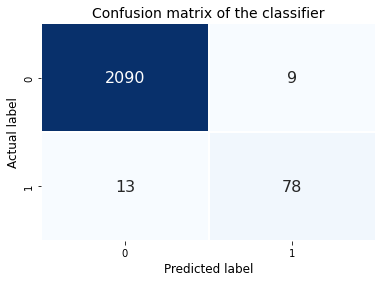

In [48]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

### Adjust weights within the Voting Classifier

We have just seen that the Voting Classifier allows us to improve our fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights we can play with how much emphasis we give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but we still want to combine aspects of the others to further improve our results.

In [49]:
# combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[("lr", clf1), ("rf", clf2), ("gnb", clf3)], voting="soft", weights=[1,4,1], flatten_transform=True)

ensemble_model.fit(X_train, y_train)
predicted = ensemble_model.predict(X_test)
probs = ensemble_model.predict_proba(X_test)

# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted)))

Accuracy Score: 0.9917808219178083

ROC score = 0.9737132805260487

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.94      0.86      0.90        91

    accuracy                           0.99      2190
   macro avg       0.97      0.93      0.95      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2094    5]
 [  13   78]]



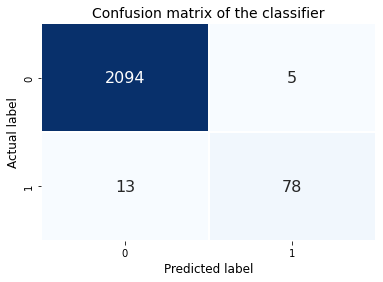

In [50]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

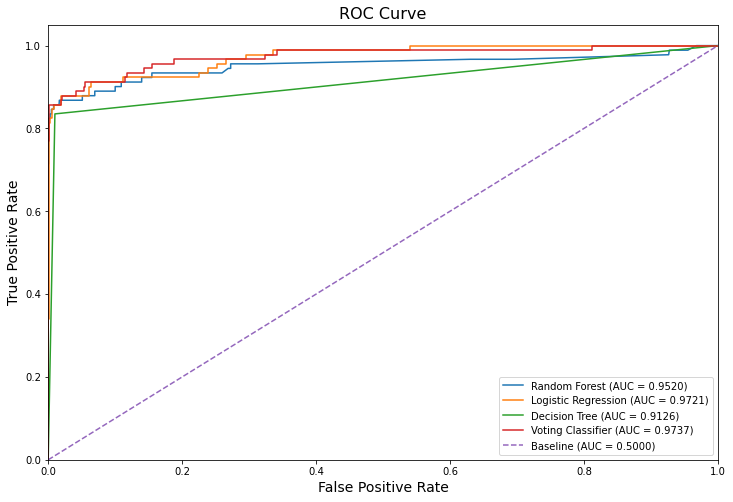

In [51]:
# create ROC curves
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, CV_model.predict_proba(X_test)[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
ensemble_fpr, ensemble_tpr, ensemble_thresholds = roc_curve(y_test, ensemble_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12, 8))

# plot Random Forest ROC
plt.plot(fpr, tpr, label="Random Forest (AUC = {:1.4f})".format(roc_auc_score(y_test, CV_model.predict_proba(X_test)[:,1])))
# plot Linear Regression ROC
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression (AUC = {:1.4f})".format(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])))
# plot Decision Tree ROC
plt.plot(tree_fpr, tree_tpr, label="Decision Tree (AUC = {:1.4f})".format(roc_auc_score(y_test, tree_model.predict_proba(X_test)[:,1])))
# plot Voting Classifier ROC
plt.plot(ensemble_fpr, ensemble_tpr, label="Voting Classifier (AUC = {:1.4f})".format(roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:,1])))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.savefig("roc.png", bbox_inches="tight")
plt.show()

***
### Discussion 
By combining the classifiers, we can take the best of multiple models. Random Forest as a standalone model was good in Precision but quite bad in terms of false negatives. Logistic Regression was good in Recall but very bad in terms of false positives. Decision Tree was in the middle. By combining these models together we indeed managed to improve performance. We have increased the cases of fraud that we are catching from 75 to 78, and reduced false negatives by 3, and we only have 4 extra false positives in return. If we do care about catching as many fraud cases as we can, whilst keeping the false positives low, this is a pretty good trade-off. 


| Model | Precision | Recall | f1-score | Accuracy | AUC ROC | TP | FP | FN | TN |
|---|---|---|---|---|---|---|---|---|---|
| Random Forest | 0.99 | 0.82 | 0.90 | 0.9922 | 0.9743 | 75 | 1 | 16 | 2098 |
| Logistic Regression | 0.65 | 0.88 | 0.74 | 0.9749 | 0.9721 | 80 | 44 | 11 | 2055 |
| Decision Tree | 0.79 | 0.84 | 0.81 | 0.9840 | 0.9128 | 76 | 20 | 15 | 2079 |
| Voting Classifier | 0.94 | 0.86 | 0.90 | 0.9918 | 0.9738 | 78 | 5 | 13 | 2094 |



---
# <a name="uml">Unsupervised Machine Learning</a>
When we do not have labels for fraud cases (often in real life circumstances), we have to make use of unsupervised machine learning. When using unsupervised learning techniques for fraud detection, we want to distinguish normal from abnormal (thus potentially fraudulent) behavior. As a fraud analyst to understand what is "normal", we need to have a good understanding of the data and its characteristics. 

In [52]:
# load the dataset
df = pd.read_csv("banks.csv")

print(df.shape)
df.head()

(7200, 6)


,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.71,0
1,426989,4,F,es_health,39.29,0
2,310539,3,F,es_transportation,18.76,0
3,215216,4,M,es_transportation,13.95,0
4,569244,2,M,es_transportation,49.87,0


In [53]:
# explore the features available in the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7200 non-null   int64  
 1   age         7200 non-null   object 
 2   gender      7200 non-null   object 
 3   category    7200 non-null   object 
 4   amount      7200 non-null   float64
 5   fraud       7200 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 337.6+ KB
None


In [54]:
# count the occurrences of fraud and no fraud cases
df["fraud"].value_counts()

0    7000
1     200
Name: fraud, dtype: int64

In [55]:
# count the occurrences of fraud and no fraud cases
df["fraud"].value_counts(normalize=True)

0    0.972222
1    0.027778
Name: fraud, dtype: float64

In [56]:
# groupby categories and take the mean
df.groupby("category").mean().sort_values(by="fraud", ascending=False)

,Unnamed: 0,amount,fraud
category,,,
es_leisure,186541.307692,229.757600,1.000000
es_travel,338897.777778,231.818656,0.944444
es_sportsandtoys,238775.539474,157.251737,0.657895
es_otherservices,241279.000000,149.648960,0.600000
es_hotelservices,280138.548387,172.756245,0.548387
es_health,335355.176955,126.604704,0.242798
es_home,248312.583333,120.688317,0.208333
es_tech,310473.948718,132.852862,0.179487
es_hyper,244440.712500,46.788180,0.125000


As shown above, the majority of fraud is observed in leisure, travel, and sports related transactions.

### Customer segmentation

We're going to check whether there are any obvious patterns for the clients in this data, thus whether we need to segment the data into groups, or whether the data is rather homogenous.

We unfortunately don't have a lot client information available; we can't for example distinguish between the wealth levels of different clients. However, there is data on age available, so let's see whether there is any significant difference between behavior of age groups.

In [57]:
# group by age groups and get the mean
df.groupby("age").mean()

,Unnamed: 0,amount,fraud
age,,,
0,327520.450000,49.468935,0.050000
1,290985.509116,35.622829,0.026648
2,296867.958851,37.228665,0.028718
3,291471.417346,37.279338,0.023283
4,306041.396403,36.197985,0.035966
5,290885.960859,37.547521,0.023990
6,299193.716561,36.700852,0.022293
U,288372.181818,39.117000,0.000000


In [58]:
df["age"].value_counts().sort_index()

0      40
1     713
2    2333
3    1718
4    1279
5     792
6     314
U      11
Name: age, dtype: int64

Based on the results above, does it make sense to divide the data into age segments before running a fraud detection algorithm? As we can see the average amount spent as well as fraud occurrence is rather similar across groups. Age group '0' stands out but since there are only 40 cases, it does not make sense to split these out in a separate group and run a separate model on them.

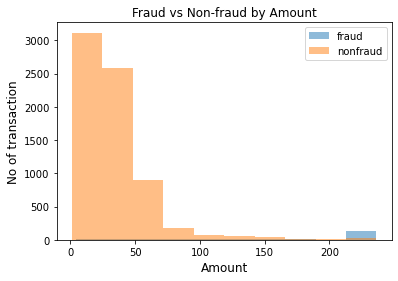

In [59]:
# create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.title("Fraud vs Non-fraud by Amount")
plt.xlabel("Amount", fontsize=12)
plt.ylabel("No of transaction", fontsize=12)
plt.legend()
plt.show()

As the number fraud observations is much smaller, it is difficult to see the full distribution. Nonetheless, we can see that the fraudulent transactions tend to be on the larger side relative to normal obervations. This is good news, as it helps us later in detecting fraud from non-fraud. Next we are going to implement a clustering model to distinguish between normal and abnormal transactions, **when the fraud labels are no longer available.**

In [60]:
# load the dataset
df = pd.read_csv("banks_a.csv")

print(df.shape)
df.head()

(7189, 19)


,Unnamed: 0,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
# count the occurrences of fraud and no fraud
df["fraud"].value_counts()

0    6989
1     200
Name: fraud, dtype: int64

In [62]:
# count the occurrences of fraud and no fraud
df["fraud"].value_counts(normalize=True)

0    0.97218
1    0.02782
Name: fraud, dtype: float64

### Scaling the data

For ML algorithms using distance based metrics, it is crucial to always scale our data, as features using different scales will distort our results. K-means uses the Euclidian distance to assess distance to cluster centroids, therefore we first need to scale the data before continuing to implement the algorithm. Let's do that first.

In [63]:
# create input and target variable
# transform features into a numpy array

X = np.array(df.drop(["Unnamed: 0", "fraud"], axis=1)).astype(np.float)
y = df["fraud"].values

C:\Users\USER\AppData\Local\Temp\ipykernel_13792\1166591023.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(df.drop(["Unnamed: 0", "fraud"], axis=1)).astype(np.float)


In [64]:
# import the scaler
from sklearn.preprocessing import MinMaxScaler

# define the scaler and apply to the data, default feature_range=(0, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### K-means clustering

A very commonly used clustering algorithm is K-means clustering. For fraud detection, K-means clustering is straightforward to implement and relatively powerful in predicting suspicious cases. It is a good algorithm to start with when working on fraud detection problems. However, fraud data is often times very large, especially when we are working with transaction data. MiniBatch K-means is an efficient way (faster) to implement K-means on a large dataset, which we will use in this project.

In [65]:
# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
# default: n_clusters=8, init='k-means++', max_iter=100, batch_size=100,
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(random_state=0)

We have now fitted the MiniBatch K-means model to the data. The default n_clusters is 8. But we need to figure our what the right number of clusters to use is.

### Elbow method

We've implemented MiniBatch K-means with 8 clusters, without actually checking what the right amount of clusters should be. For our first fraud detection approach, it is important to get the number of clusters right, especially when we want to use the outliers of those clusters as fraud predictions. To decide which amount of clusters we're going to use, let's apply the Elbow method and see what the optimal number of clusters should be based on this method.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmean

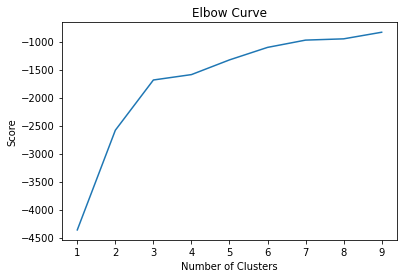

In [66]:
# define the range of clusters to try
clustno = range(1, 10)

# run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# plot the models and their respective score 
plt.plot(clustno , score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmean

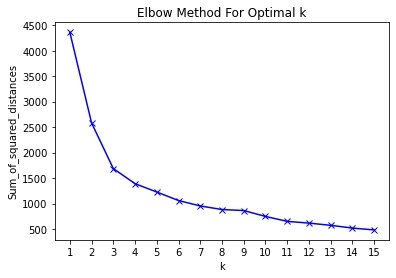

In [67]:
# ANOTHER METHOD:
# For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

# kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)
Sum_of_squared_distances = []
# Cluster_centers = []
clustno = range(1,16)
for k in clustno:
    km = MiniBatchKMeans(n_clusters=k, random_state=0)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)
#     Cluster_centers.append(km.cluster_centers_)
    
# print("There are {} clusters.".format(len(Cluster_centers), "\n"))
plt.plot(clustno, Sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method For Optimal k")
plt.show()

Now we can see that the optimal number of clusters should probably be at around 3 clusters, as that is where the elbow is in the curve. We'll use this as our baseline model, and see how well this does in detecting fraud.

### Detecting outliers

In the next section, we're going to use the K-means algorithm to predict fraud, and compare those predictions to the actual labels that are saved, to sense check our results.

The fraudulent transactions are typically flagged as the observations that are furthest aways from the cluster centroid. We'll need to determine the cut-off point.

In [68]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)

# save the cluster centroids
X_test_clusters_centers = kmeans.cluster_centers_

# calculate the distance to the cluster centroids for each point
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# create fraud predictions based on outliers on clusters 
# define the boundary between fraud and non fraud to be at 95% of distance distribution and higher
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now we have the predictions from our kmeans model, let's check how it compares to the actual labels.

### Checking model results

In the previous section we've flagged all observations to be fraud, if they are in the top 5th percentile in distance from the cluster centroid. I.e. these are the very outliers of the three clusters. We have the scaled data and labels already split into training and test set, so y_test is available. The predictions, km_y_pred, are also available. Let's create some performance metrics and see how well we did.

In [69]:
# check the results
km_y_pred[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

Accuracy Score: 0.9592025961984237

ROC score = 0.8197704982668266



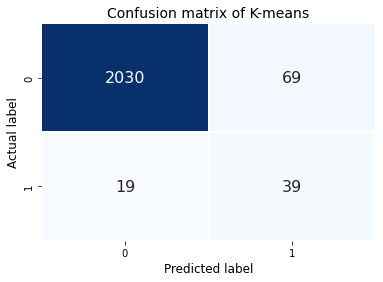

In [70]:
# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, km_y_pred)))

# obtain the ROC score
print("ROC score = {}\n".format(roc_auc_score(y_test, km_y_pred)))

# create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# plot the confusion matrix in a figure to visualize results 
sns.heatmap(km_cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of K-means", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("_cm.png", bbox_inches="tight")
plt.show()

If we were to decrease the percentile used as a cutoff point in the previous exercise to 93% instead of 95%, what would that do to our prediction results? The number of fraud cases caught increases, but false positives also increase. By lowering the threshold for cases flagged as fraud, we flag more cases overall but thereby also get more false positives.

### DBSCAN
DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density. DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

Parameters:

The DBSCAN algorithm basically requires 2 parameters:

- eps: the minimum distance between two points. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

- minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

DBSCAN vs K-means

- no need to predefine number of clusters
- adjust maximum distance between points within clusters
- assign minimum amount of samples in clusters
- better performance on weirdly shaped data (i.e. non-convex)
- but higher computational costs

This time, we are not going to take the outliers of the clusters and use that for fraud, but take the smallest clusters in the data and label those as fraud.

In [71]:
# import DBSCAN
from sklearn.cluster import DBSCAN

# initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# obtain the predicted labels 
pred_labels = db.labels_

# calculate number of clusters
# Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
n_clusters = len(set(pred_labels)) - (1 if -1 in y else 0)

# print performance metrics for DBscan
print("Estimated number of clusters: {}".format(n_clusters))
print("Homogeneity: {:0.4f}".format(homogeneity_score(y, pred_labels)))
print("Silhouette Coefficient: {:0.4f}".format(silhouette_score(X_scaled, pred_labels)))

Estimated number of clusters: 23
Homogeneity: 0.6117
Silhouette Coefficient: 0.7127


The number of clusters using DBSCAN (23) is much higher than with K-means (3). For fraud detection this is for now OK, as we are only interested in the smallest clusters, since those are considered as abnormal. Now let's have a look at those clusters and decide which one to flag as fraud.

### Assessing smallest clusters

In this exercise we're going to have a look at the clusters that came out of DBSCAN, and flag certain clusters as fraud:

- first, we need to figure out how big the clusters are, and filter out the smallest
- then, we're going to take the smallest ones and flag those as fraud
- last, we'll check with the original labels whether this does actually do a good job in detecting fraud

In [72]:
# count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]
print(smallest_clusters)

# print the counts of the smallest clusters only
print("Their counts are:")      
print(counts[smallest_clusters])

[21 17  9]
Their counts are:
[10 15 15]


So now we know which smallest clusters we could flag as fraud. If we were to take more of the smallest clusters, we cast our net wider and catch more fraud, but most likely also more false positives. It is up to the fraud analyst to find the right amount of cases to flag and to investigate. In the next section we'll check the results with the actual labels.

### Checking results

We're going to check the results of DBSCAN fraud detection model. In reality, we often don't have reliable labels and this where a fraud analyst can help us validate the results. He/She can check our results and see whether the cases we flagged are indeed suspicious. We can also check historically known cases of fraud and see whether our model flags them.

In [73]:
# create a dataframe of the predicted cluster numbers and fraud labels 
df_result = pd.DataFrame({'clusternr':pred_labels,'fraud':y})

# create a condition flagging fraud for the smallest clusters 
df_result['predicted_fraud'] = np.where((df_result.clusternr==21)|(df_result.clusternr==17)|(df_result.clusternr==9), 1 , 0)

# run a crosstab on the results 
print(pd.crosstab(y, df_result['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6973  16
1               176  24


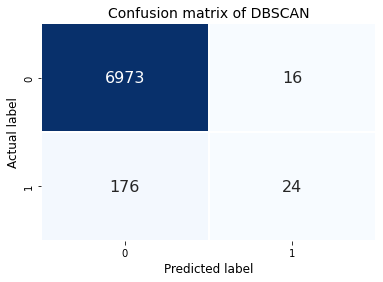

In [74]:
# plot the confusion matrix in a figure to visualize results
testabc = pd.crosstab(y, df_result['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud'])
sns.heatmap(testabc, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of DBSCAN", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("_cm.png", bbox_inches="tight")
plt.show()

How does this compare to the K-means model? The good thing is: out of all flagged cases (40), roughly 2/3 are actually fraud (24)! Since we only take the three smallest clusters, by definition we flag less cases of fraud, so we catch less but also have less false positives. However, we are missing quite a lot of fraud cases. Increasing the amount of smallest clusters we flag could improve that, at the cost of more false positives of course. 

### Validate the model results
In reality, we often don't have reliable labels of the actual fraud cases (i.e. the ground truth), thus it is difficult to validate model results with normal performance metrics (e.g. accuracy). But there are other ways to do so:

- check with fraud analyst
- investigate and describe cases that are flagged in more detail
- compare to past known cases of fraud (use model on past known fraud cases to see whether the model can actually detect those historical fraud cases correctly)

***
# <a name="conclusion">Discussion and Conclusion</a>
In this project, we have used both supervised and unsupervised machine learning techniques to detect fraud cases. We use supervised machine learning when we have fraud cases with labels. By combining the classifiers, we can take the best of multiple models. Random Forest as a standalone model was good in Precision but quite bad in terms of false negatives. Logistic Regression was good in Recall but very bad in terms of false positives. Decision Tree was in the middle. By combining these models together we indeed managed to improve performance. We have increased the cases of fraud that we are catching from 75 to 78, and reduced false negatives by 3, and we only have 4 extra false positives in return. If we do care about catching as many fraud cases as we can, whilst keeping the false positives low, this is a pretty good trade-off. 


| Model | Precision | Recall | f1-score | Accuracy | AUC ROC | TP | FP | FN | TN |
|---|---|---|---|---|---|---|---|---|---|
| Random Forest | 0.99 | 0.82 | 0.90 | 0.9922 | 0.9743 | 75 | 1 | 16 | 2098 |
| Logistic Regression | 0.65 | 0.88 | 0.74 | 0.9749 | 0.9721 | 80 | 44 | 11 | 2055 |
| Decision Tree | 0.79 | 0.84 | 0.81 | 0.9840 | 0.9128 | 76 | 20 | 15 | 2079 |
| Voting Classifier | 0.94 | 0.86 | 0.90 | 0.9918 | 0.9738 | 78 | 5 | 13 | 2094 |

<br>
When we do not have labels for fraud cases (often in real life circumstances), we can use unsupervised machine learning  techniques to distinguish normal from abnormal (thus potentially fraudulent) behavior. This requires an understanding of what is "normal" and we need to have a good understanding of the data and its characteristics. It is important to point out that it is difficult to validate unsupervised machine learning model results with normal performance metrics (e.g. accuracy, prevision, recall) because we don't have the actual fraud labels, or the ground truth. But there are other ways to do so such as check with fraud analysts to help us validate and see whether the cases we flagged are indeed suspicious , investigate and describe cases that are flagged in more detail and use model on past known fraud cases to see whether the model can actually detect those historical fraud cases correctly.


---
### References
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
- https://github.com/limchiahooi/fraud-detection/blob/master/.ipynb_checkpoints/fraud-detection-checkpoint.ipynb
- https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html